In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
data_range = [(1,34),      # B0
              (165,205),   # B1
              (336,376),   # B2
              (507,547),   # B3
              (678,718),   # B4
              (849,889),   # B5
              (1020,1060), # B6
              (1191,1231), # B7
              (1362,1402), # B8
              (1533,1573), # B9
              (1704,1744), # B10
              (1875,1915)] # B11

In [20]:
def load_data():
    data = []
    plain = []
    for i in range(256):
        for j in range(100):
            temp = np.load("./attack_data/p" + str((i*100)+j) + ".npy")
            data.append(temp)
            plain.append(i)
    
    del temp
    data = np.array(data)
    plain = np.array(plain)

    return data, plain

def CPA_single_byte(data, plain):
    correlation = np.zeros((256,len(data[0])))
    temp = np.zeros((256,256*100), dtype=np.uint8)
    
    for k in range(256):
        for t in range(256*100):
            temp[k,t] = np.bitwise_xor(plain[t],k)
            temp[k,t] = bin(temp[k,t]).count('1')
        
        for p in range(len(data[0])):
            correlation[k,p] = np.corrcoef(temp[k,:],data[:,p])[0][1]
    return np.argmax(np.max(correlation.transpose(), axis=0)), correlation.transpose()

def CPA_attack():
    key = []
    correlations = []
    data, plain = load_data()
    for i, r in enumerate(data_range):
        key_byte, corr = CPA_single_byte(data[:,r[0]:r[1]], plain)
        key.append(key_byte)
        correlations.append(corr)
        print("Key byte ", i, ":", key_byte)

    return key, correlations

In [21]:
key, correlations = CPA_attack()

Key byte  0 : 3
Key byte  1 : 125
Key byte  2 : 57
Key byte  3 : 93
Key byte  4 : 180
Key byte  5 : 207
Key byte  6 : 86
Key byte  7 : 102
Key byte  8 : 111
Key byte  9 : 39
Key byte  10 : 191
Key byte  11 : 91


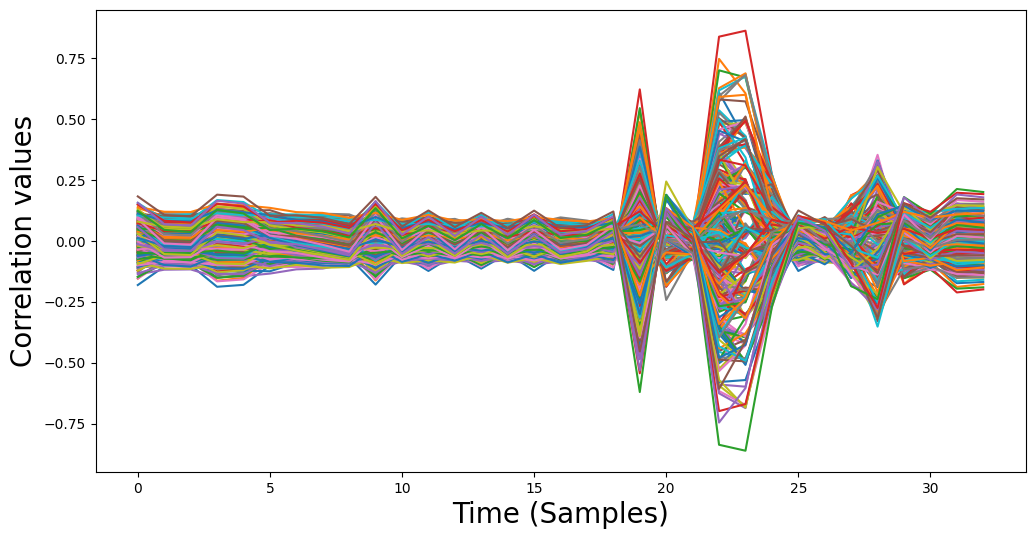

In [23]:
plt.figure(figsize=(12,6))

plt.plot(correlations[0])

plt.xlabel("Time (Samples)", fontsize=20)
plt.ylabel("Correlation values", fontsize=20)

plt.show()